## KrisFace GAN on Mark's Facial Landmarks

Reimplementing a basic GAN with the fastai framework

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
import cv2
import numpy as np
from torchvision import transforms
from skimage import io, transform
# import tensorflow as tf

In [52]:
path = pathlib.Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace')
path_og = path/'original'
path_land = path/'landmarks'
# will make the following paths in the img resize task
path_og_lr = path/'original-96' #low res
path_og_mr = path/'original-256' #medium res
path_land_lr = path/'landmarks-96'
path_land_mr = path/'landmarks-256'

# Create LR, HR Landmarks

In [53]:
#Resize facial landmark imgs to 96 and 256
def resize_one(fn, img, path, size):
    dest = path/fn.relative_to(path_land) 
    print(dest)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=90) #95 is most, 75 is default

In [54]:
il = ImageList.from_folder(path_og)
src = ImageList.from_folder(path_land)

In [57]:
# #create smaller facial landmark pics first time this nb is run
sets = [(path_land_lr, 96), (path_land_mr, 256)]
for p,size in sets:
    if not p.exists(): # if already exists, don't perform
        print(f'resizing to {size} into {p}')
        parallel(partial(resize_one, path=p, size=size), src.items)

In [58]:
#resize og imgs, not necessary
def resize_one(fn, img, path, size):
    dest = path/fn.relative_to(path_og)
    print(dest)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=90) #95 is most, 75 is default

In [59]:
#create smaller og pics first time this nb is run
sets = [(path_og_lr, 96), (path_og_mr, 256)]
for p,size in sets:
    if not p.exists(): # if already exists, don't perform
        print(f'resizing to {size} into {p}')
        parallel(partial(resize_one, path=p, size=size), il.items)

resizing to 96 into /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96


/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/607.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/784.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/898.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/842.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/304.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/692.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/340.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/834.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/755.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/17.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisF

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/735.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/864.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/175.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/200.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/296.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/575.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/113.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/677.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/191.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/232.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/Kris

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/35.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/190.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/272.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/732.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/305.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/82.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/11.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/277.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/489.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/406.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFac

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/194.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/791.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/851.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/538.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/388.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/219.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/680.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/720.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/536.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/482.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/Kris

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/193.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/347.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/53.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/505.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/747.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/307.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/91.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/149.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/69.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/66.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/567.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/12.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/316.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/610.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/299.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/472.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/34.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/377.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/195.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/45.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFac

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/769.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/263.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/120.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/335.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/341.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/358.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/382.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/63.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/679.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/331.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisF

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/661.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/771.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/402.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/674.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/435.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/184.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/68.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/509.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/892.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/539.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisF

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/636.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/622.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/753.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/829.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/239.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/883.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/700.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/440.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/121.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/833.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/Kris

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/291.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/448.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/322.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/404.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/809.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/806.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/22.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/463.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/218.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/329.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisF

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/501.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/7.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/811.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/334.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/83.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/110.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/79.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/893.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/782.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-96/21.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/692.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/784.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/898.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/842.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/834.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/304.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/340.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/607.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/17.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/367.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/im

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/735.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/301.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/864.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/175.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/296.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/575.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/113.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/200.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/232.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/677.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/i

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/35.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/672.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/368.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/190.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/272.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/732.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/82.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/305.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/11.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/277.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/imag

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/495.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/865.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/201.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/194.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/791.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/851.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/538.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/388.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/219.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/720.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/i

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/419.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/229.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/327.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/53.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/193.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/40.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/347.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/505.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/747.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/91.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/imag

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/215.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/32.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/267.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/300.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/837.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/567.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/12.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/610.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/299.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/316.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ima

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/387.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/90.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/271.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/370.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/132.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/519.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/120.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/769.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/263.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/335.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/im

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/88.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/849.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/466.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/877.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/355.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/262.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/386.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/771.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/402.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/661.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/im

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/846.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/584.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/619.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/764.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/166.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/164.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/885.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/278.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/622.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/636.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/i

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/452.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/549.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/698.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/841.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/128.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/678.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/256.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/530.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/527.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/291.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/i

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/715.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/889.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/203.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/707.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/812.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/858.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/762.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/838.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/501.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/361.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/i

In [45]:
il.items

array([PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/692.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/898.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/784.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/607.png'), ...,
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/324.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/283.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/736.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original/237.png')],
      dtype=object)

# Load Model

myFace-Generator-256b

In [60]:
# medium res
src = ImageImageList.from_folder(path_land_mr).split_none() #(0.1, seed=42)

In [61]:
def get_data(bs, size):
    data = (src.label_from_func(lambda x: path_og_lr/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(do_y=True))
    
    data.c = 3
    return data

In [62]:
def gram_matrix(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [63]:
base_loss = F.l1_loss

from torchvision.models import vgg16_bn
vgg_m = vgg16_bn(True).features.cuda().eval()
requires_grad(vgg_m, False) #False means don't update weights and just use for loss

#MaxPool is the final activation fn in a layer
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 22, 32, 42],
 [ReLU(inplace), ReLU(inplace), ReLU(inplace), ReLU(inplace), ReLU(inplace)])

In [64]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [65]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,12])

In [68]:
bs, size = 6, 256
data = get_data(bs, size)

In [69]:
arch = models.resnet34

In [75]:
wd = 1e-3 #weight decay
learn = unet_learner(data, arch, wd=wd, loss_func=feat_loss, callback_fns=LossMetrics,
                     blur=True, norm_type=NormType.Weight)

#bs must correspond
learn.load
('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/models/myFace-Generator-256a')
# learn.load('myFace-Generator-256a')
# learn.load('2d')
# learn.load('myFace-Generator-1c')

Learner(data=ImageDataBunch;

Train: LabelList (903 items)
x: ImageImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256;

Valid: LabelList (0 items)
x: ImageImageList

y: ImageList

Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_siz

Populating the interactive namespace from numpy and matplotlib


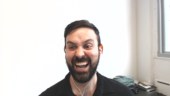

In [76]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data.y[4]

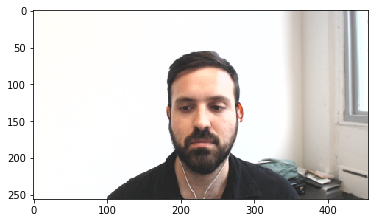

In [77]:
# img = mpimg.imread('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-256/4.png')
img = mpimg.imread('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/original-256/4.png')
imgplot = plt.imshow(img)
plt.show()

# Inferences w/ a loop
Lazy but effective. Not sure how to maintain chronology w/ a data_block

In [87]:
path_land_mr

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256')

In [91]:
len(path_land_mr.ls())

904

In [92]:
y_hat = []

for fn in range(1, len(path_land_mr.ls())):
    img_path = r'' + str(path_land_mr) + f'/{fn}.png'
    img = open_image(img_path)
    y_hat.append(learn.predict(img)[1])
    if fn % 100 == 0: 
        print (img_path)


/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/100.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/200.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/300.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/400.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/500.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/600.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/700.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/800.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/markFace/landmarks-256/900.png


In [93]:
y_hat[0].shape
#expecting ([3,256,256])

torch.Size([3, 256, 256])

# Overlay Inference on Orig

Make a video that has the og in the bkg for demonstrative purposes. Side by side would probs be best, but encoding trickiness makes this a pain

# Img Preprocessing for Video
----
`y_hat_1` has all the predictions. Now to combined them

In [96]:
import torch.nn.functional as F

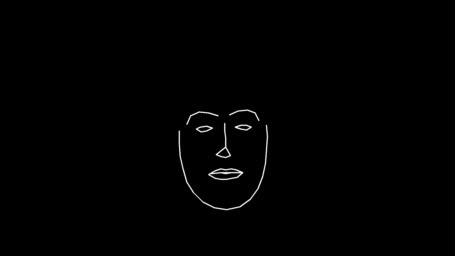

In [97]:
# y_hat[0][0].shape
# learn.predict(img)
img

In [98]:
y_hat[0].shape

torch.Size([3, 256, 256])

In [99]:
w,h = 640, 480
w1, h1 = (640-256)//2, (480-256)//2


In [100]:
# torch.zeros??
z1 = torch.zeros([3, h1, 256])
z2 = torch.zeros([3, h, w1])
z1.shape, z2.shape

(torch.Size([3, 112, 256]), torch.Size([3, 480, 192]))

In [101]:
y_hat[0].min(), y_hat[0].max()

(tensor(-0.0784), tensor(0.8877))

In [102]:
# pad 0's so can export as video (codec has a required aspect ratio)
y_t = []
for y in y_hat:
    y = torch.cat((z1, torch.clamp(y, min=0, max=1), z1), 1)
    y = torch.cat((z2, y, z2), 2)
    y_t.append(y)

In [103]:
# x = F.relu(y_t[0])

In [104]:
#og shape is (3,256,256) and is rgb, cv2 expects (640,480,3) and bgr
# just going to pad w/ 0s to get to 640x480
y_hat_bgr_formatted = [(img.permute(1,2,0)[:,:,[2,1,0]]*255).int().numpy().astype('uint8') for img in y_t]


y_hat_bgr_formatted[0].shape

(480, 640, 3)

In [105]:
y_hat_bgr_formatted[0].min(), y_hat_bgr_formatted[0].max()

(0, 226)

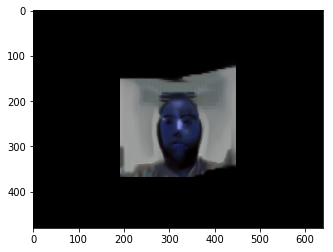

In [106]:
# plt.imshow(y_hat_bgr_formatted[0])
plt.imshow(y_hat_bgr_formatted[0])

In [107]:
# transform.resize??
# y_t = transform.resize(y_hat_bgr_formatted[0], (640,480))


# Combine Into Video

In [108]:
frames_number = len(y_hat_bgr_formatted)
frames_number

903

In [109]:
height, width, layers = y_hat_bgr_formatted[0].shape[:]
height, width, layers

(480, 640, 3)

# fin

In [111]:
import cv2
import numpy as np

fn = 'MarkFace'
fps = 30

fn_full = f'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/{fn}.avi'

writer = cv2.VideoWriter(fn_full, cv2.VideoWriter_fourcc('M','P','4','V'),fps,(width,height))

for i in range(len(y_hat_bgr_formatted)):
    x = y_hat_bgr_formatted[i]
#     x = x.reshape(480, 640, 3)
    writer.write(x)

In [1]:
writer.isOpened()

NameError: name 'writer' is not defined

In [121]:
cv2.destroyAllWindows()
writer.release()